### 1. Import the necessary libraries if you are starting a new notebook.

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)


from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### 2. Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv') 
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Renaming the columns so they follow the PE8 (snake case).

In [3]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
data.shape

(9134, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [6]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [7]:
print(data.dtypes)

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

### 3. What should we do with the customer_id column?

In [8]:
#first I check if there are any missing customer ids or duplicates.

data.isnull().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
duplicate_ids = data.duplicated(subset='customer', keep=False)
duplicate_ids_count = duplicate_ids.sum()

duplicate_ids_count

0

#### <font color=green>There are no dups or nulls in customer id col but I will keep it, becasue it might be helpful in segmentation/bining data</font>


### 4. Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:

In [10]:
numerical = data.select_dtypes(include = np.number)
categorical = data.select_dtypes(include = np.object)

In [11]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 5. Plot every categorical variable. What can you see in the plots? Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the column on the x-axis and an appropriate measure on the y-axis. However, this time you will try a different plot. This time in each plot for the categorical variable you will have, each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis

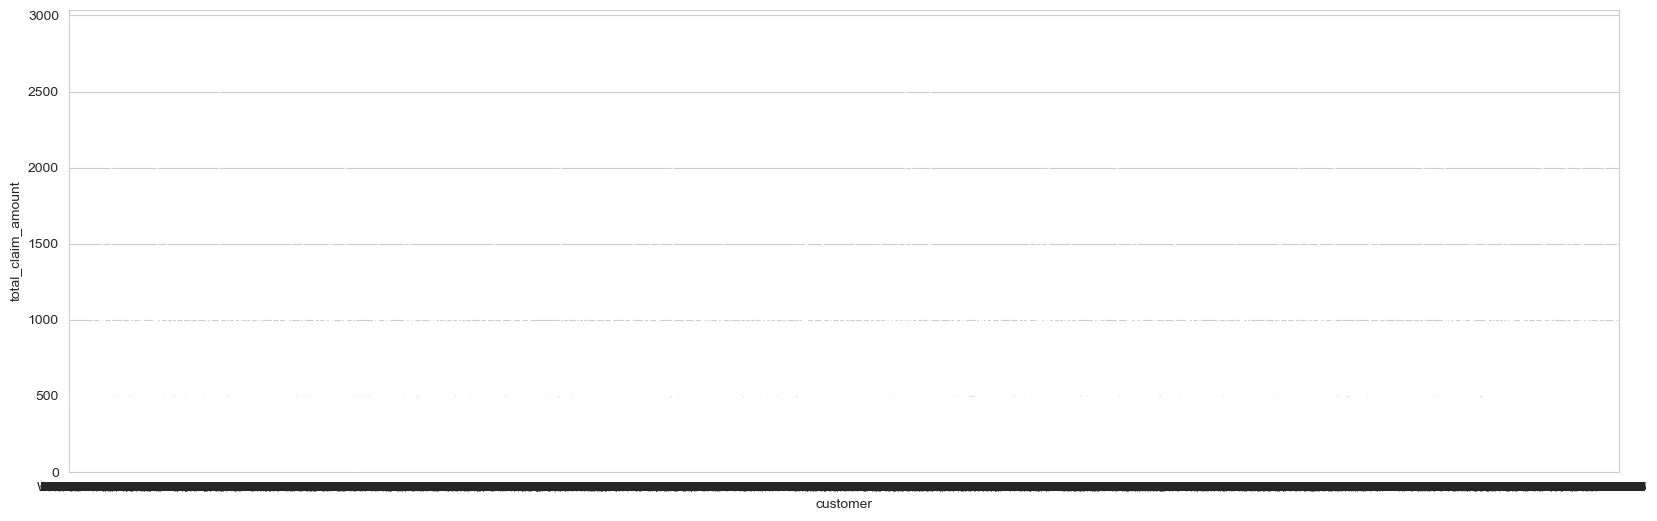

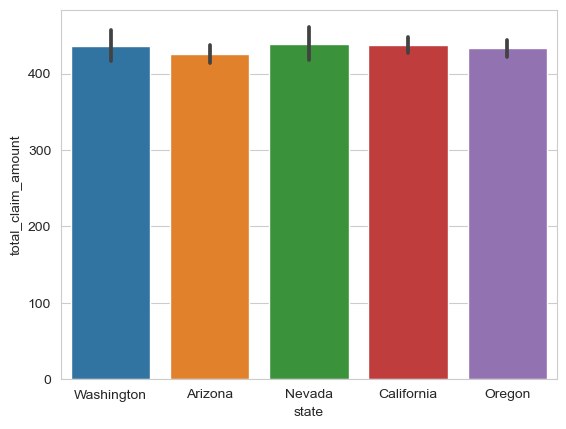

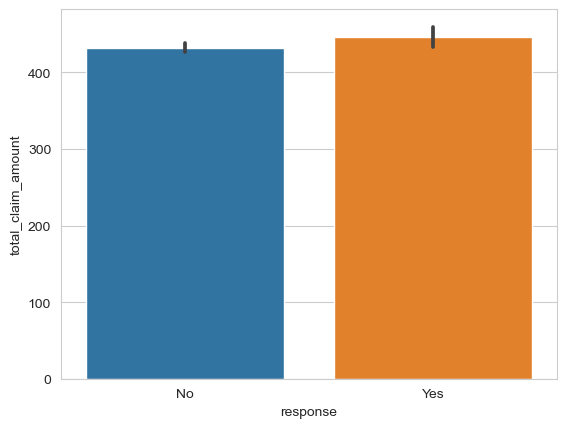

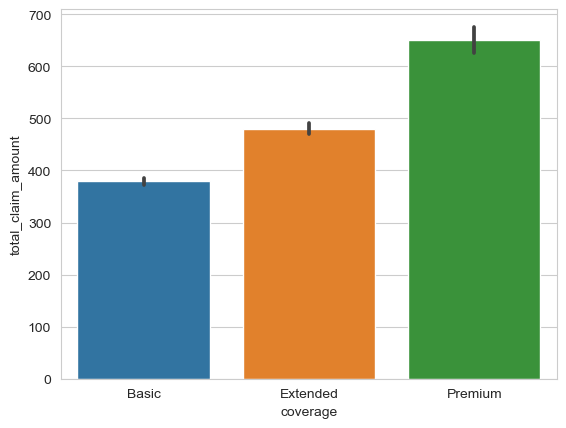

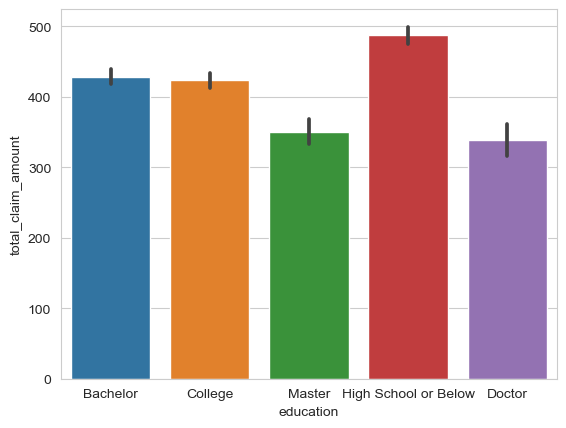

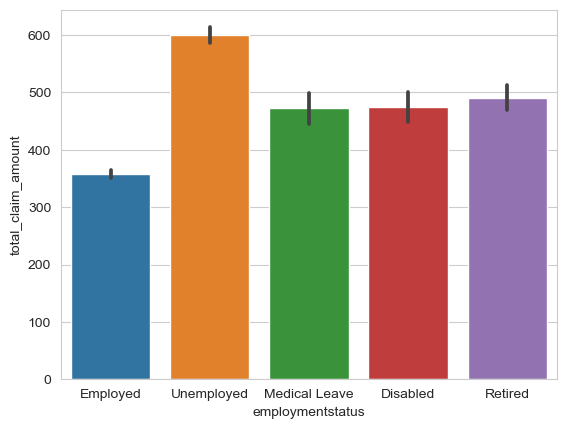

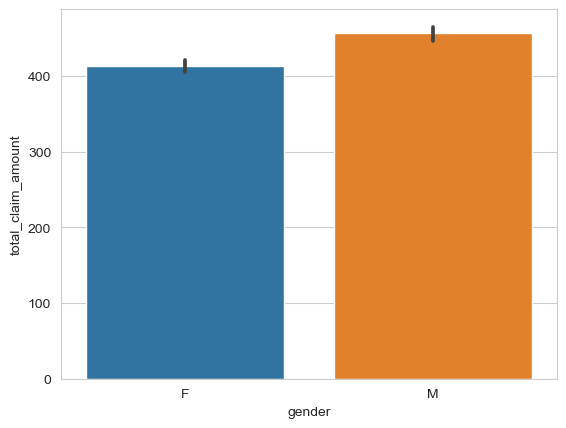

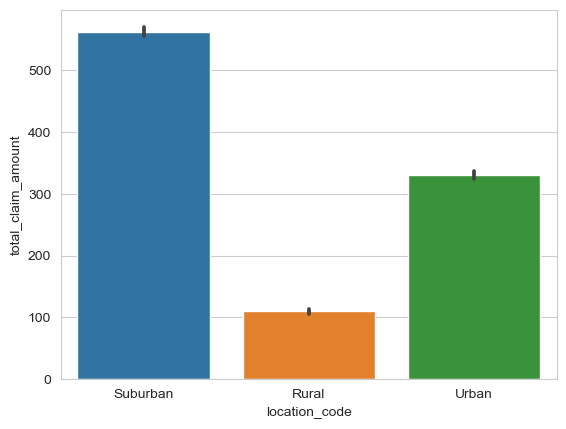

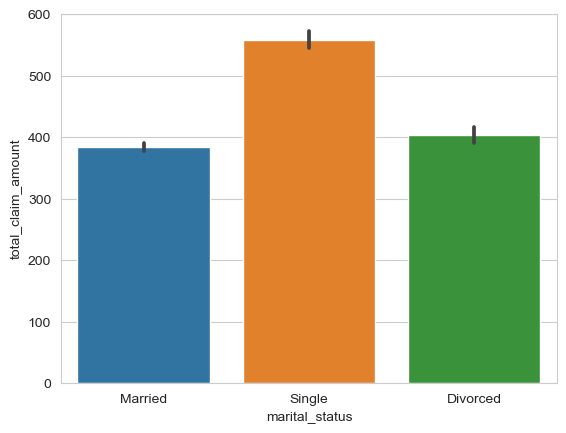

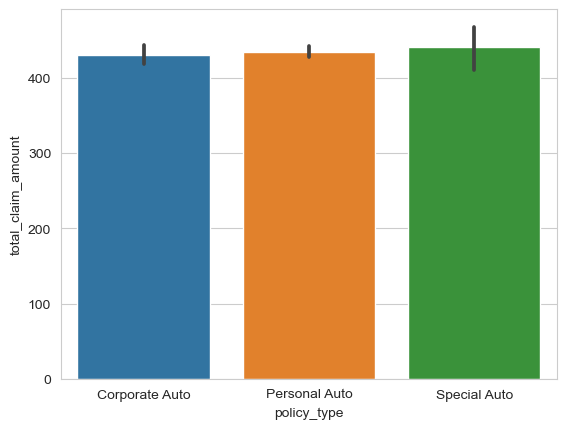

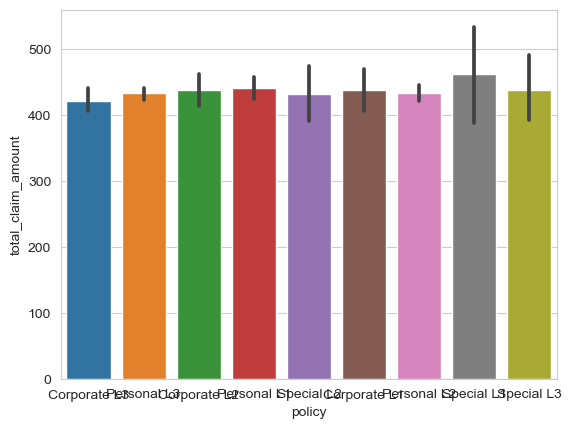

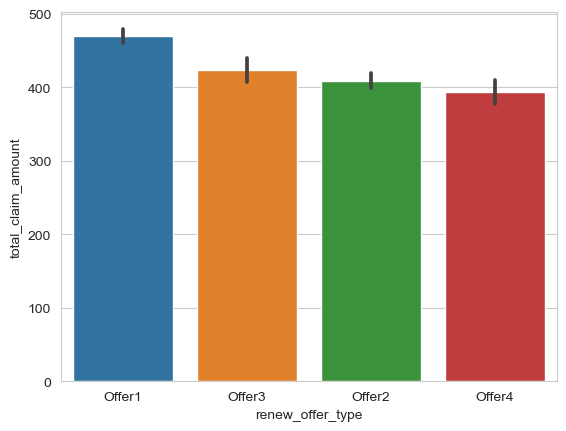

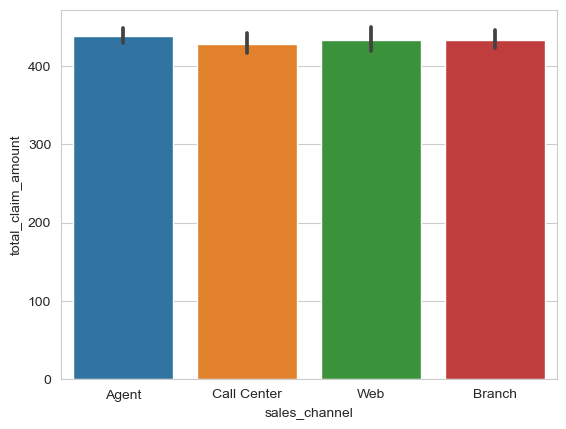

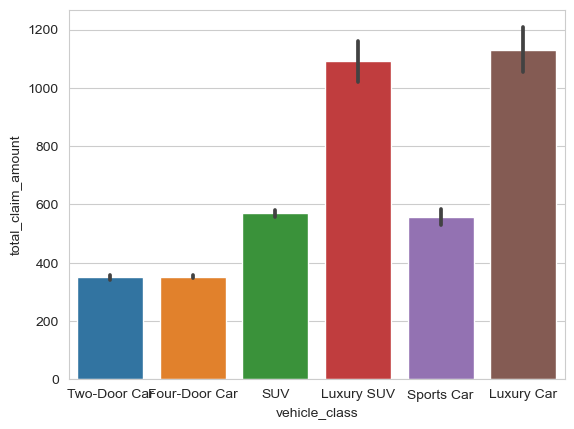

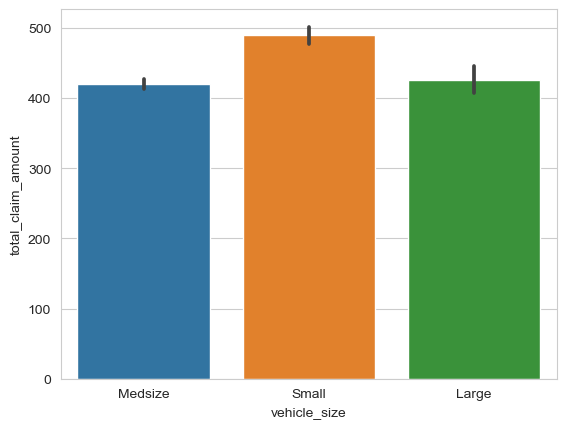

In [12]:
#let's see how it is like to have total_claim_amount as our target.

plt.figure(figsize=(20, 6)) 

for col in categorical.columns:
    sns.barplot(x=col, y='total_claim_amount', data=data)
    plt.show()

**state, response**: It doesn't affect the total_claim_amount significantly. So we can drop them.
**coverage, education, employment status, gender, location code, marital status, policy, renew offer type,vehicle class,vehicle size **:  have some level of correlation with the target.
**Policy type,sales channel** : not a highe correlation with total_claim_amount. we can drop them.



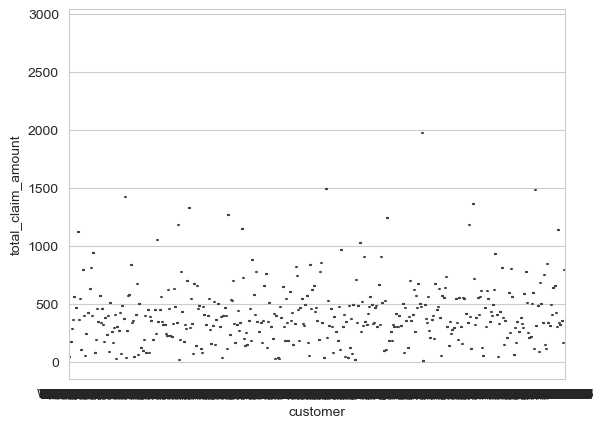

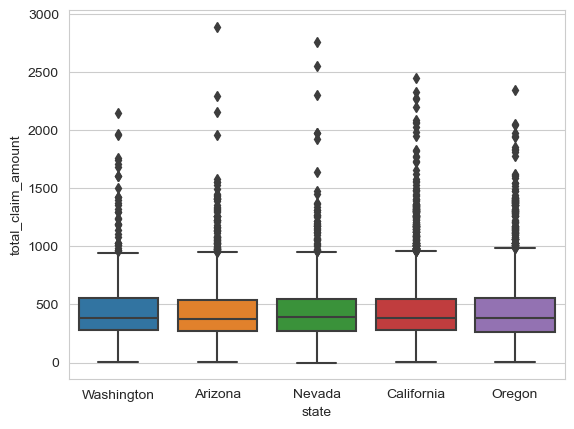

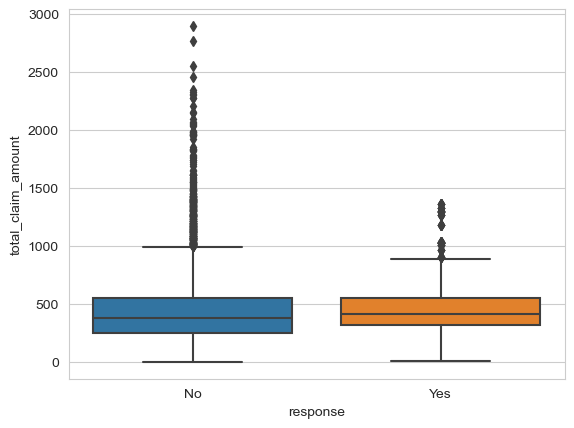

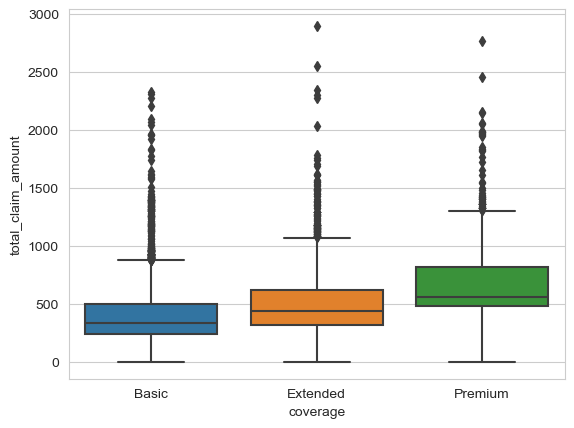

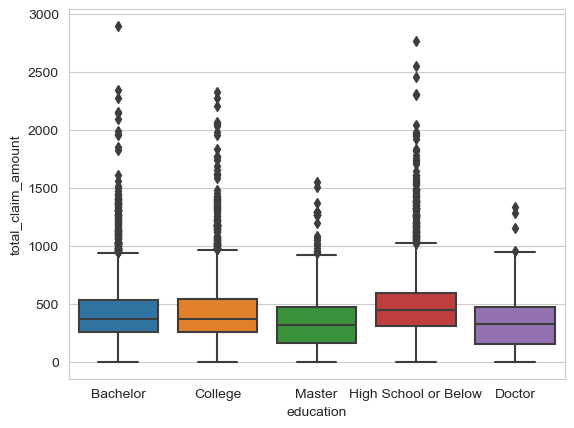

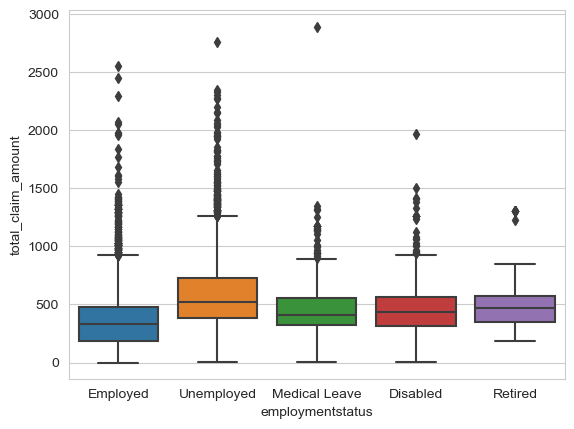

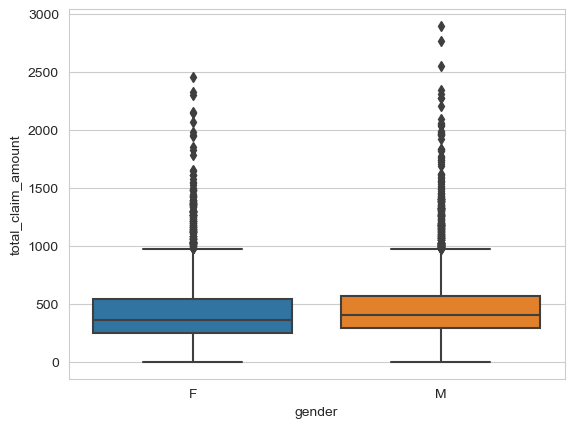

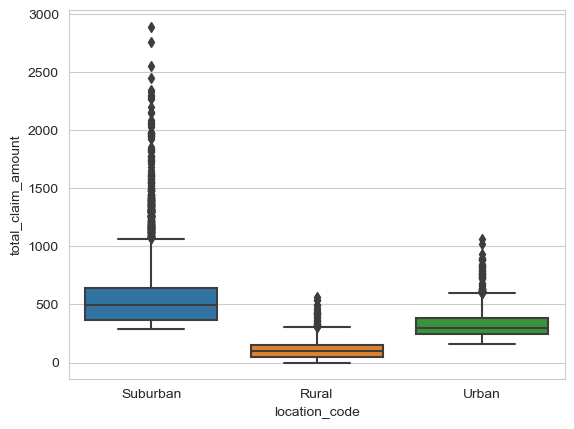

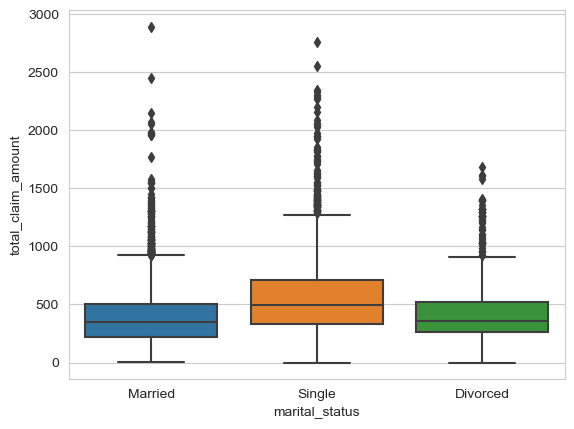

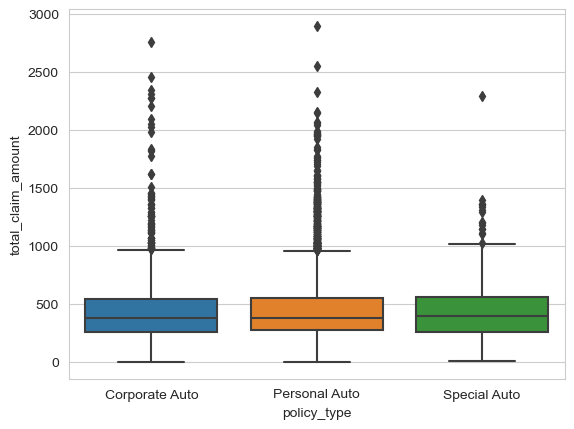

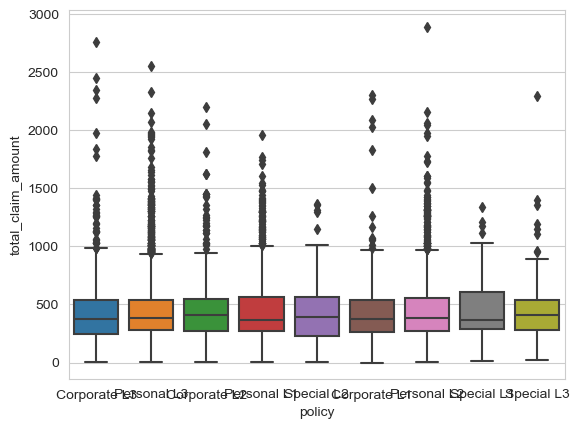

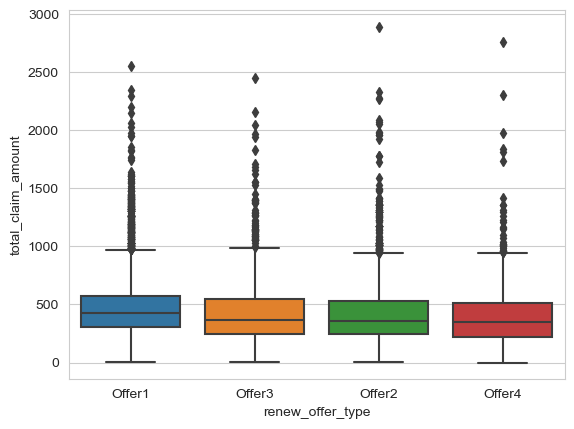

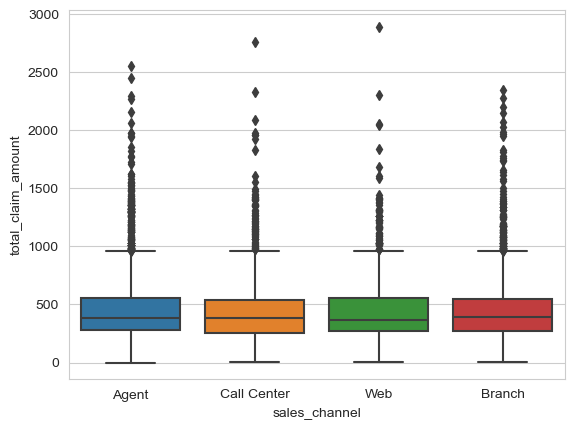

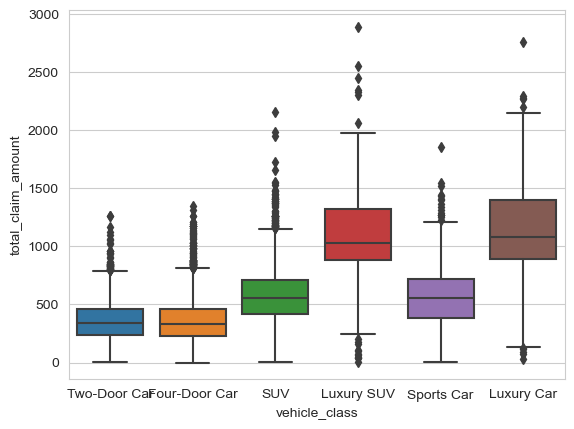

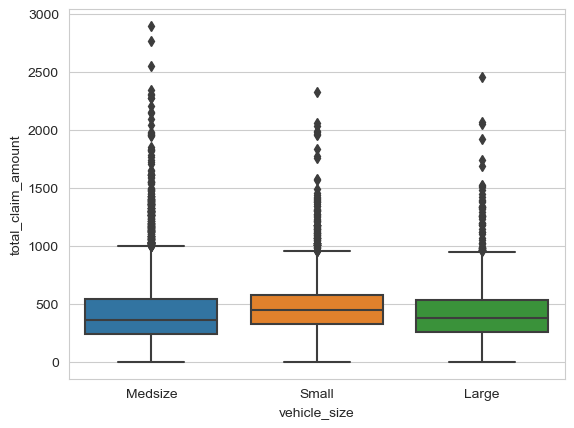

In [13]:
for col in categorical.columns:
    sns.boxplot(x=col, y='total_claim_amount', data=data)
    plt.show()

In [14]:
columns_to_drop = ['state', 'response', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'sales_channel', 'vehicle_size']
categorical_new = categorical.drop(columns=columns_to_drop)
categorical_new.head()

,customer,coverage,policy_type,policy,renew_offer_type,vehicle_class
0,BU79786,Basic,Corporate Auto,Corporate L3,Offer1,Two-Door Car
1,QZ44356,Extended,Personal Auto,Personal L3,Offer3,Four-Door Car
2,AI49188,Premium,Personal Auto,Personal L3,Offer1,Two-Door Car
3,WW63253,Basic,Corporate Auto,Corporate L2,Offer1,SUV
4,HB64268,Basic,Personal Auto,Personal L1,Offer1,Four-Door Car


### 6. For the categorical data, check if there is any data cleaning that need to perform. Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. Discuss if this information might in some way be used for data cleaning.

In [15]:
for col in categorical_new.columns:
    print("Value counts for column '{}':".format(col))
    print(categorical_new[col].value_counts())
    print("--------------------")

Value counts for column 'customer':
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: customer, Length: 9134, dtype: int64
--------------------
Value counts for column 'coverage':
Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64
--------------------
Value counts for column 'policy_type':
Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64
--------------------
Value counts for column 'policy':
Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64
--------------------
Value counts for column 'renew_offer_type':
Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64
--------------------
Value counts for column 'v

<font color=purple>I don't dsee meaingless values that need to be replaced.Everything is clean and different categories have sufficient amount of data so I don;t see a need for binning</font>



# <font color=Blue>LAB Feature extraction</font>


### 1. Open the categoricals variable we created before.

In [16]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


### 2.Plot all the categorical variables with the proper plot. What can you see?

Already did in exercise 5 of prevoius lab which is included in this notbook.

### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

As mentioned in the previous lab:

<font color=purple>state, response: It doesn't affect the customer lifetime value significantly. So we can drop them. coverage: Logically customers with premium or extended coverage have higher customer lifetime value. education, employment, gender, location code, marital status, sales channel, vehicle size : not a highe correlation with customer lifetime value. we can drop them. Policy type, policy, renew offer type, vehicle class: They have some level of correlation with customer lifetime value so we'll keep them.</font>

In [17]:
# have done the below already:
#columns_to_drop = ['state', 'response', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'sales_channel', 'vehicle_size']
#categorical_new = categorical.drop(columns=columns_to_drop)
categorical_new.head()

,customer,coverage,policy_type,policy,renew_offer_type,vehicle_class
0,BU79786,Basic,Corporate Auto,Corporate L3,Offer1,Two-Door Car
1,QZ44356,Extended,Personal Auto,Personal L3,Offer3,Four-Door Car
2,AI49188,Premium,Personal Auto,Personal L3,Offer1,Two-Door Car
3,WW63253,Basic,Corporate Auto,Corporate L2,Offer1,SUV
4,HB64268,Basic,Personal Auto,Personal L1,Offer1,Four-Door Car


### 4. Plot time variable. Can you extract something from it?

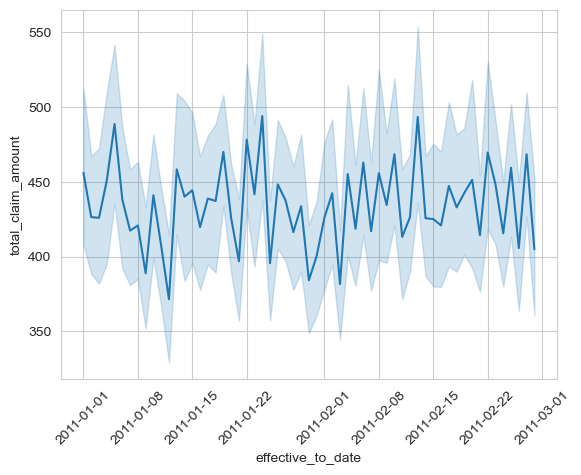

In [18]:
sns.lineplot(data = data, x = "effective_to_date", y = "total_claim_amount" )
plt.xticks(rotation=45)
plt.show()

### Why did my plot turn in to this mess?

In [19]:
data['effective_month'] = data['effective_to_date'].dt.strftime('%b')
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Feb
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Jan
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Feb
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Jan
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Feb


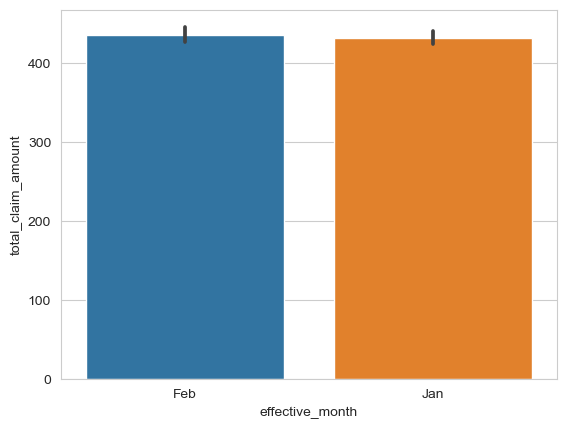

In [20]:
sns.barplot(x='effective_month', y='total_claim_amount', data=data)
plt.show()

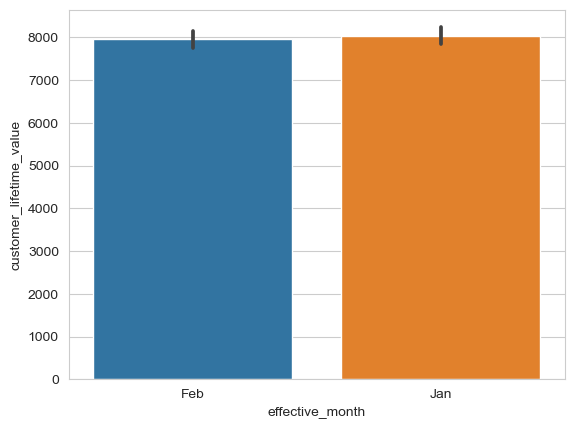

In [21]:
sns.barplot(x='effective_month', y='customer_lifetime_value', data=data)
plt.show()

<font color=purple>Month or probabaly in general the time captured in this data set doesn't affect the total_claim_amount or the customer_lifetime_value</font>

#  <div class="alert alert-warning">Lab | Data cleaning and wrangling</div>

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

In [22]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [23]:
#sns.boxplot(x=data['IC1'],whis=5)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'customer_lifetime_value'),
  Text(1, 0, 'income'),
  Text(2, 0, 'monthly_premium_auto'),
  Text(3, 0, 'months_since_last_claim'),
  Text(4, 0, 'months_since_policy_inception'),
  Text(5, 0, 'number_of_open_complaints'),
  Text(6, 0, 'number_of_policies'),
  Text(7, 0, 'total_claim_amount')])

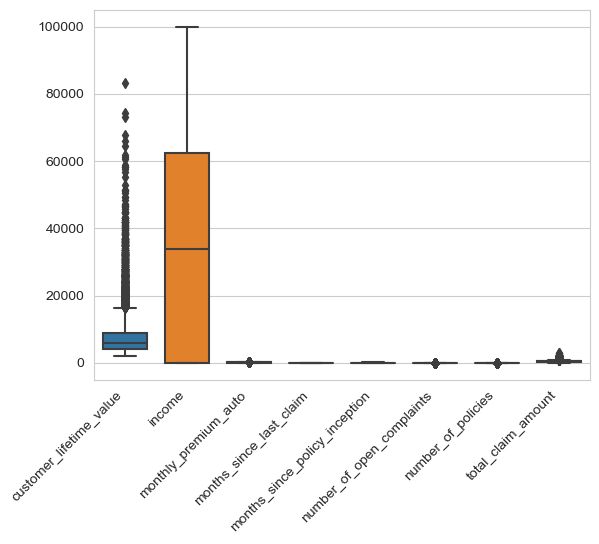

In [24]:
sns.boxplot(data=data, width=0.7) 
plt.xticks(rotation=45, ha='right')

<AxesSubplot:xlabel='customer_lifetime_value'>

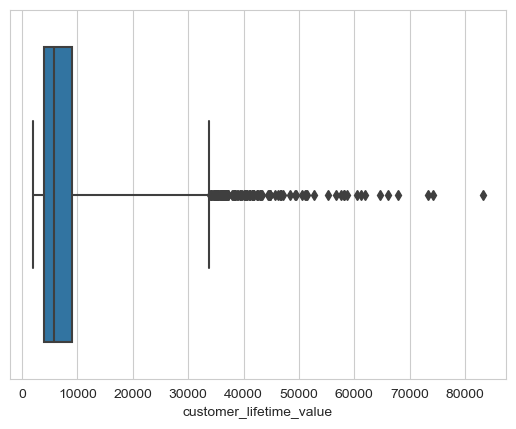

In [25]:
sns.boxplot(x=data['customer_lifetime_value'],whis=5) #increased the whis/threshold cuz with 1.5 there were so many outliers.

In [26]:
#removing outliers for customer_lifetime_value
iqr = np.percentile(data['customer_lifetime_value'],75) - np.percentile(data['customer_lifetime_value'],25) 
iqr

4967.915247000001

In [27]:
# define the limits
upper_limit = np.percentile(data['customer_lifetime_value'],75) + 5*iqr
lower_limit = np.percentile(data['customer_lifetime_value'],25) - 5*iqr
upper_limit, lower_limit

(33801.74327625, -20845.324440750002)

In [28]:
# Removing rows with values outside of lower and upper limits

data = data[(data['customer_lifetime_value']>lower_limit) & (data['customer_lifetime_value']<upper_limit)]
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Feb
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Jan
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Feb
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Jan
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Feb


In [29]:
data['customer_lifetime_value'].describe()

count     9016.000000
mean      7548.459338
std       5523.809074
min       1898.007675
25%       3962.515701
50%       5722.216814
75%       8808.431131
max      33718.842400
Name: customer_lifetime_value, dtype: float64

In [30]:

new_data = data.copy()

def remove_outliers():
    for col in new_data.columns:
        iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
        
        upper_limit = np.percentile(data[col],75) + 1.5*iqr
        lower_limit = np.percentile(data[col],25) - 1.5*iqr
        
        new_data = data[(data[col]>lower_limit) & (data[col]<upper_limit)]
        
        return new_data
    
new_data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Feb
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Jan
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Feb
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Jan
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Feb


In [31]:
new_data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000,9016.000000
mean,7548.459338,37636.932453,92.526176,15.083962,47.941327,0.384650,2.978815,430.487490
std,5523.809074,30398.157441,33.651039,10.054193,27.917019,0.912113,2.403200,286.291685
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3962.515701,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,270.372667
50%,5722.216814,33875.000000,82.000000,14.000000,48.000000,0.000000,2.000000,379.200000
75%,8808.431131,62344.750000,108.000000,23.000000,71.000000,0.000000,4.000000,546.048176
max,33718.842400,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 2. Create a copy of the dataframe for the data wrangling.

In [32]:
df= new_data.copy()
df.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Feb
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Jan


### 3. Normalize the continuous variables. You can use any one method you want.

In [33]:
#Splitting data (X-y Split)

y = df['total_claim_amount']
X = df.drop(['total_claim_amount'], axis=1)
X.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Feb
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Jan
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Feb
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Jan
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Feb


In [34]:
#Separating numericals and categoricals

X_num= X.select_dtypes(include='number')
X_cat= X.select_dtypes(include='object')

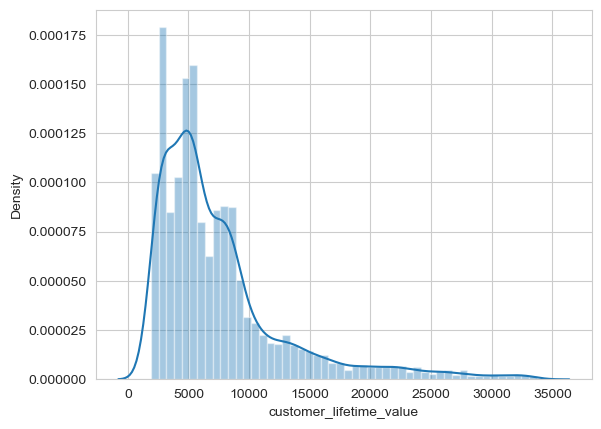

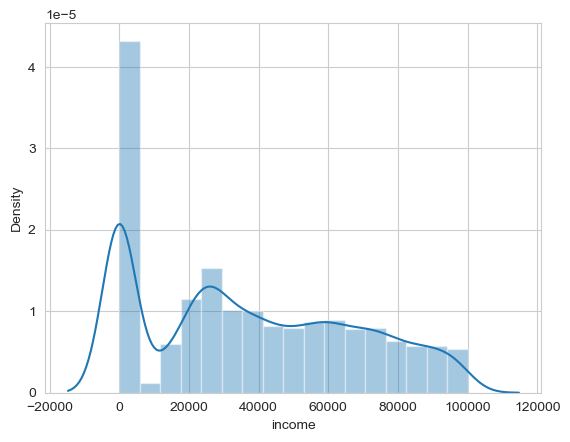

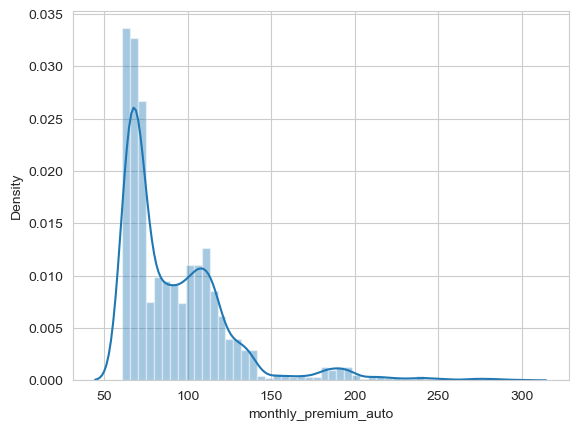

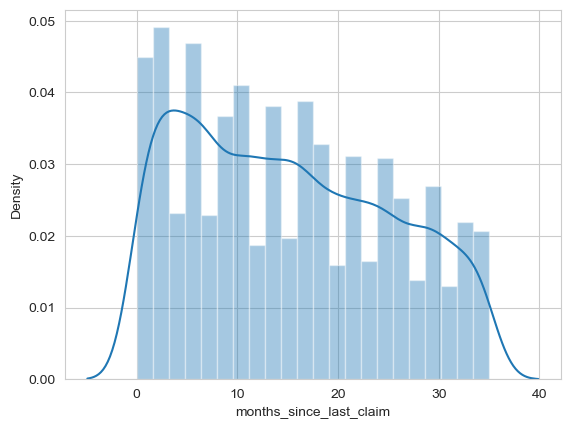

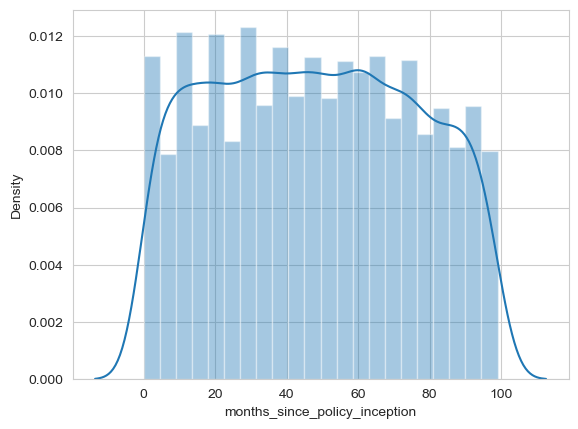

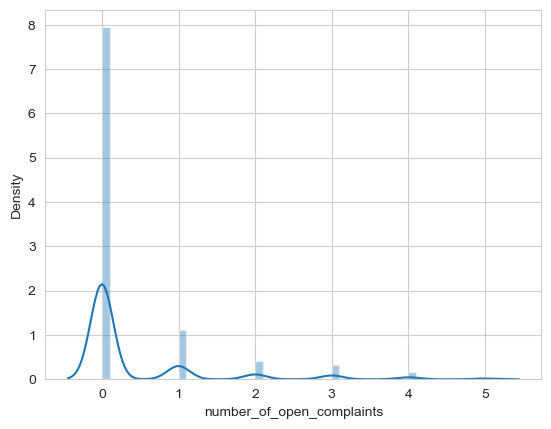

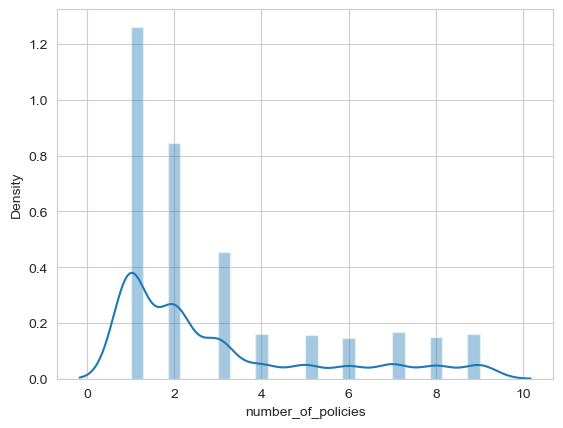

In [35]:
# checking the distributions 
for column in X_num.columns:
    sns.distplot(X_num[column])
    plt.show()

In [36]:
transformer = MinMaxScaler().fit(X_num) ### USE MINMAX FOR NORMALIZING
x_minmax = transformer.transform(X_num) #This is a an array of arrays
print(x_minmax.shape)

(9016, 7)


In [37]:
X_num_norm = pd.DataFrame(x_minmax,columns=X_num.columns)
X_num_norm.head() 

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.027200,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.159692,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.345353,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.180632,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.028776,0.438443,0.050633,0.342857,0.444444,0.0,0.000


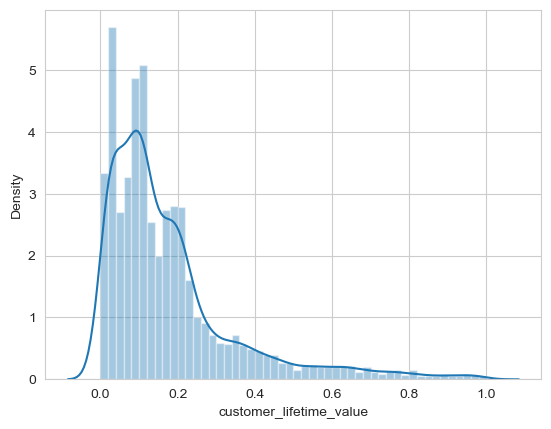

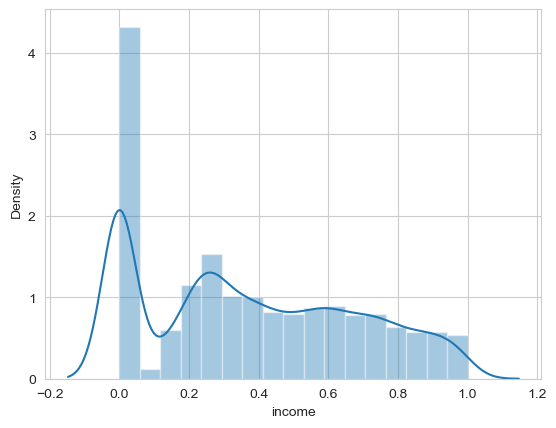

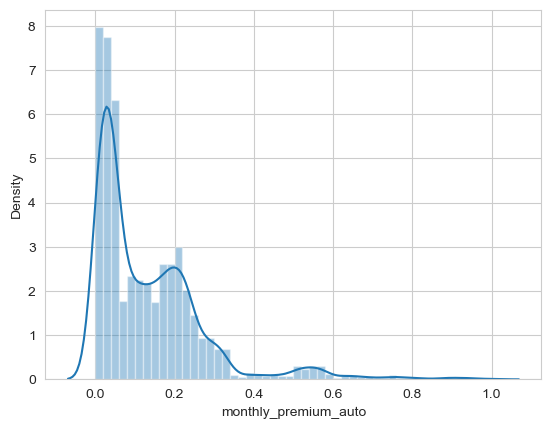

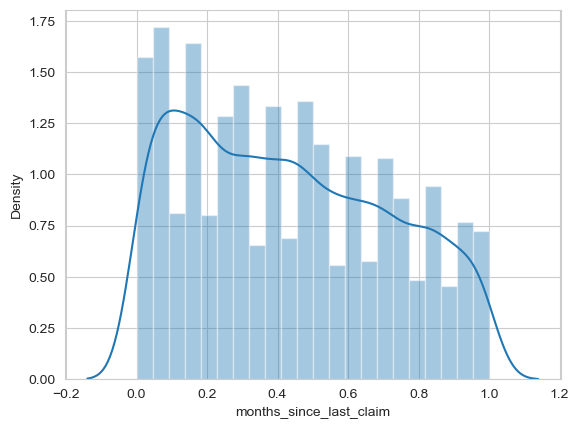

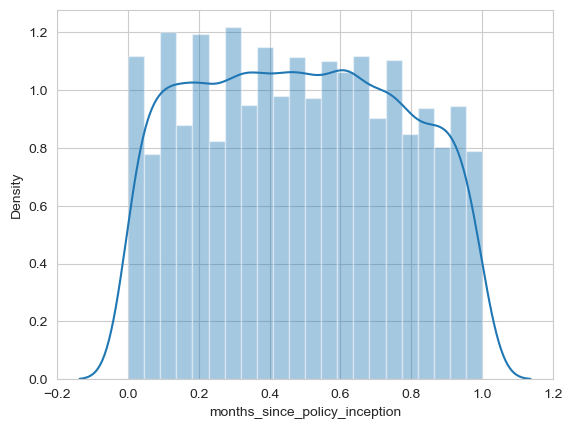

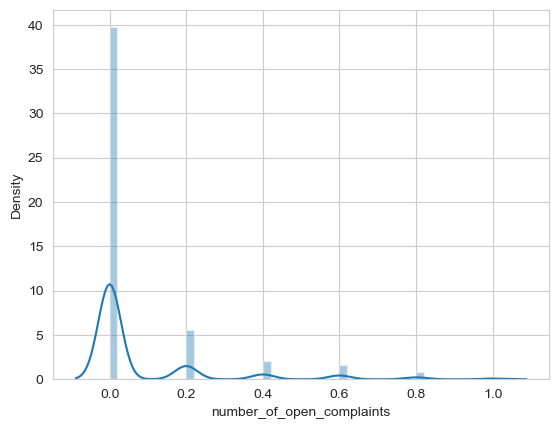

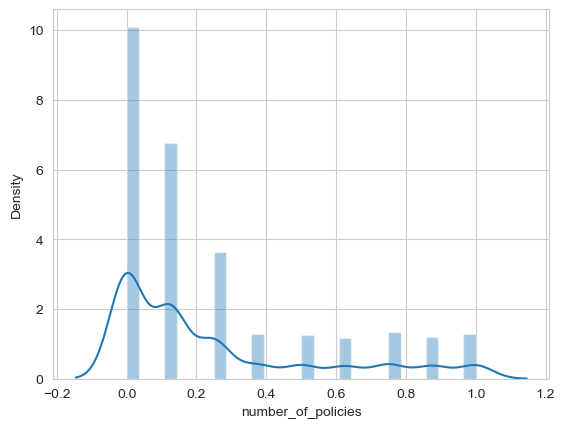

In [38]:
for column in X_num_norm.columns:
    sns.distplot(X_num_norm[column])
    plt.show()

### 4.Encode the categorical variables

In [39]:
X_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Feb
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Jan
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Feb
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Jan
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Feb


#### You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):
#### One hot to state
#### Ordinal to coverage
#### Ordinal to employmentstatus
#### Ordinal to location code
#### One hot to marital status
#### One hot to policy type
#### One hot to policy
#### One hot to renew offercustomer_df
#### One hot to sales channel
#### One hot vehicle class
#### Ordinal vehicle size

In [40]:
X_cat_encode=X_cat[['state','gender','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class']]
X_cat_encode.head()

,state,gender,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class
0,Washington,F,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car
1,Arizona,F,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car
2,Nevada,F,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car
3,California,M,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV
4,Washington,M,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car


In [41]:
#Encoding the colmns mentiones in the instruction

X_cat_encode_dumm = pd.get_dummies(X_cat_encode, drop_first=True) 

X_cat_encode_dumm.head()

,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### <font color=green>Ordinal</font>
<font color=green>first I should check the values for each ordinal category</font>


In [42]:
X_cat['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [43]:
X_cat['location_code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [44]:
X_cat['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [45]:
X_cat['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [46]:


# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.

X_cat["coverage"] = X_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_cat["employmentstatus"] = X_cat["employmentstatus"].map({"Employed" : 2, "Medical Leave" : 1, "Disabled" : 0, "Retired" : 0,"Unemployed" : 0})
X_cat["location_code"] = X_cat["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
X_cat["vehicle_size"] = X_cat["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})
X_cat["education"] = X_cat["education"].map({"High School or Below" : 0, "College" : 1, "Bachelor" : 2, "Master" : 3, "Doctor" : 4})
X_cat.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,effective_month
0,BU79786,Washington,No,0,2,2,F,1,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,1,Feb
1,QZ44356,Arizona,No,1,2,0,F,1,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,1,Jan
2,AI49188,Nevada,No,2,2,2,F,1,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,1,Feb
3,WW63253,California,No,0,2,0,M,1,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,1,Jan
4,HB64268,Washington,No,0,2,2,M,0,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,1,Feb


### 5.The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [47]:
X_date=X[['effective_to_date']]
X_date.head()

,effective_to_date
0,2011-02-24
1,2011-01-31
2,2011-02-19
3,2011-01-20
4,2011-02-03


In [48]:
X_date.dtypes

effective_to_date    datetime64[ns]
dtype: object

In [49]:
X_date['effective_day'] = X_date['effective_to_date'].dt.day
X_date['effective_week'] = X_date['effective_to_date'].dt.week
X_date['effective_month'] = X_date['effective_to_date'].dt.month
X_date['effective_year'] = X_date['effective_to_date'].dt.year

X_date.head()

,effective_to_date,effective_day,effective_week,effective_month,effective_year
0,2011-02-24,24,8,2,2011
1,2011-01-31,31,5,1,2011
2,2011-02-19,19,7,2,2011
3,2011-01-20,20,3,1,2011
4,2011-02-03,3,5,2,2011


In [50]:
X_date.dtypes

effective_to_date    datetime64[ns]
effective_day                 int64
effective_week                int64
effective_month               int64
effective_year                int64
dtype: object

### 6.Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

<font color=green>**I should clean 2 data frames:**</font>

<font color=green>1.X_date => droping effective_to_date since it is not numerical</font>
<font color=green>2.X_cat => it includes the formated ordinal cols but not the encoded ones, I should drop the cols that were encoded later.</font>

<font color=green>**Finally I should concat X_date, X_cat (formatted ordinals) and X_cat_encode_dumm**</font>

In [59]:
X_date=X_date.drop('effective_to_date', axis=1)
X_date.head()

,effective_day,effective_week,effective_month,effective_year
0,24,8,2,2011
1,31,5,1,2011
2,19,7,2,2011
3,20,3,1,2011
4,3,5,2,2011


In [57]:
X_cat=X_cat.drop(['customer','state','response', 'gender','effective_month','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class'], axis=1)

X_cat.head()

,coverage,education,employmentstatus,location_code,vehicle_size
0,0,2,2,1,1
1,1,2,0,1,1
2,2,2,2,1,1
3,0,2,0,1,1
4,0,2,2,0,1


In [60]:
df_final = pd.concat([X_date, X_cat, X_cat_encode_dumm], axis=1)
df_final.head()

,effective_day,effective_week,effective_month,effective_year,coverage,education,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,24,8,2,2011,0,2,2,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,31,5,1,2011,1,2,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,19,7,2,2011,2,2,2,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,20,3,1,2011,0,2,0,1,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,3,5,2,2011,0,2,2,0,1,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
